### CSE 252A (Computer Vision I)  ·  Fall 2020  ·  Assignment 1

---

### Instructor: David Kriegman
### Assignment published on Friday, October 16, 2020
### Due on Friday, October 30, 2020 at 11:59 pm Pacific Time

---

## Instructions
* Review the academic integrity and collaboration policies on Canvas. This assignment must be completed individually.
* All solutions must be written in this notebook. Programming aspects of the assignment must be completed using Python (preferably 3.6+).
* If you want to modify the skeleton code, you may do so. The existing code is merely intended to provide you with a framework for your solution.
* You may use Python packages for basic linear algebra (e.g. simple operations from NumPy or SciPy), but you may **not** use packages that directly solve the problem. If you are unsure about using a specific package or function, please ask the instructor and teaching assistants for clarification.
* You must submit, through Gradescope, both (1) this notebook exported as a PDF **and** (2) this notebook as an `.ipynb` file. You must mark every problem in the PDF on Gradescope. If you do not submit both the `.pdf` and `.ipynb`, and/or if you do not mark every problem in the PDF on Gradescope, you may receive a penalty.
* It is highly recommended that you begin working on this assignment early.
* **Late policy:** Assignments submitted late will receive a 10% grade reduction for each day late (e.g. an assignment submitted an hour after the due date will receive a 10% penalty, an assignment submitted 10 hours after the due date will receive a 10% penalty, and an assignment submitted 28 hours after the due date will receive a 20% penalty). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only), you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.

# Problem 1: Perspective Projection and Homogenous Coordinates [10 pts]
### Part 1 [3 pts]
Consider a perspective projection where a point 
$$
P = [\text{x y z}]^T
$$
is projected onto an image plane $\Pi'$ represented by $k = f'>0$ as shown in the following figure.
![title](fig1.png)

The first second and third coordinate axes are denoted by $i$, $j$, $k$ respectively. 

Consider the projection of two rays in the world coordinate system
$$
Q1 = [\text{4 -1 3}] + t[\text{5 3 3}]
$$
$$
Q2 = [\text{1 -3 2}] + t[\text{5 3 3}]
$$
where $-\infty \leq t \leq -2$. 

Calculate the coordinates of the endpoints of the projection of the rays onto the image plane. Identify the vanishing point based on the coordinates.  
 
 
### Part 2 [6 pts]
Show that:

1) In $\mathbb{R}^{3}$ distances are preserved under a rigid transformation.

2) In $\mathbb{R}^{2}$ parallel lines remain parallel under an affine transformation.

3) If $a, b \in \mathbb{R}^{3}$ are orthogonal, they are orthogonal after rotating by a rotation matrix $R$

### Part 3 [1 pts]
Given four points  forming a square with Cartesian coordinates  (0,0), (1,0), (1,1), and (0,1), find a projective transformation, A, which sends any two of the points to infinity while the other two are not sent to infinity. Define the matrix A below and print the result of applying the transformation to each of the four points.

# Answer:

## P1.1
1. Firstly, we need to write the homogeneous coordinates of two lines:
<br> $l_1:\ 3x/f' - 5y/f' - 17 = 0$
<br> $l_2:\ 3x/f' - 5y/f' - 18 = 0$
<br> which means that the coordinates of those two lines are:
<br> $(3, -5, -17)^T$ and $(3, -5, -18)^T$, so the intersection point of those two lines should be:
<br> $(3, -5, -17)^T \times (3, -5, -18)^T = 
\begin{vmatrix}
i & j & k\\
3 & -5 & -17\\
3 & -5 & -18
\end{vmatrix} = 
(5,3, 0)^T$
<br>So, in homogeneous coordinates, the position is $(5, 3, 0)^T$


### P1.2

##### 1) In $\mathbb{R}^{3}$ distances are preserved under a rigid transformation.
<br>The rigid transformation $T(v)$ onto vector $v$ can be denoted as $T(v) = Rv + t$
<br>where $R^T = R^{-1}$, $R$ is an orthogonal transformation, which means that $det(R) = 1$
<br>Let us check the distance $dist(v_1, v_2) = \sqrt{(v_1 - v_2)^T(v_1 - v_2)}$ and 
<br>$dist(T(v_1), T(v_2)) = \sqrt{(T(v_1)-T(v_2))^T(T(v_1)-T(v_2))}= \sqrt{(Rv_1 - Rv_2)^T(Rv_1 - Rv_2)} \\
= \sqrt{(v_1 - v_2)^TR^TR(v_1 - v_2)} = \sqrt{(v_1 - v_2)^T(v_1 - v_2)} = dist(v_1, v_2)$


##### 2) In $\mathbb{R}^{2}$ parallel lines remain parallel under an affine transformation.
<br> Suppose two lines are $l_1:\ t\vec{u}+\vec{p}$ and $l_2:\ t\vec{v} + \vec{q}$, $\vec{v} = k\vec{u}$ for some k because of parallelism
<br> Our affine transformation is $f(\vec{x}) = A\vec{x} + b$
<br> $A(l_1):\ A(t\vec{u} + \vec{p}) + b = tA\vec{u} + A\vec{p} + b$
<br> $A(l_2):\ A(t\vec{v} + \vec{q}) + b = tA\vec{v} + A\vec{q} + b$
<br> Therefor, we have that $A\vec{u} = kA\vec{v}$, which means that parallel lines remain parallel under an affine
transformation.

##### 3) If $a, b \in \mathbb{R}^{3}$ are orthogonal, they are orthogonal after rotating by a rotation matrix $R$
<br> Rotation matrix:$R^T = R^{-1}$, $det(R) = 1$
<br> If a, b are orthogonal, $a^Tb = 0$
<br> $(Ra)^T (Rb) = a^T (R^TR) b = a^Tb = 0$
<br> So after rotating by a rotation matrix, a and b are also orthogonal.

### P1.3
3. In this problem we need to define a homogeneous matrix, which has form:
<br> $ H = 
\begin{bmatrix}
h_{00} & h_{01} & h_{02} \\
h_{10} & h_{11} & h_{12} \\
h_{20} & h_{21} & h_{22} 
\end{bmatrix}
$ and $\bar{x'} = H\bar{x}$, where $\bar{x}$ means $x$'s homogeneous coordinate.
<br> and I choose to project $(0,1)$ and $(1,1)$ to infinity, so we have:
<br> $h_{20} \cdot 0 + h_{21} \cdot 1 + h_{22} \cdot 1 = 0$
<br> $h_{20} \cdot 1 + h_{21} \cdot 1 + h_{22} \cdot 1 = 0$
<br> so we can obtain $h_{20}, h_{21}, h_{22}$, and set the other parameters to 1.
<br>
$ H = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
0 & -1 & 1
\end{bmatrix}$

In [105]:
# import numpy as np

A = np.array([[1,1,1],
              [1,1,1],
              [0,-1,1]]) # Fill this in
X = np.array([[1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,1]]) # Fill this in
print("A\n{}\nX\n{}\nAX\n{}".format(A, X, (A@X.T).T))

A
[[ 1  1  1]
 [ 1  1  1]
 [ 0 -1  1]]
X
[[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
AX
[[3 3 0]
 [2 2 1]
 [2 2 0]
 [1 1 1]]


## Problem 2: Image Formation and Rigid Body Transformations [10 points]

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective camera model. The goal will be to photograph the following four points 
$$^AP_1 = [\text{-1 -0.5 2}]^T$$,  $$^AP_2 = [\text{1 -0.5 2}]^T$$, $$^AP_3 = [\text{1 0.5 2}]^T$$, $$^AP_4 = [\text{-1 0.5 2}]^T$$

To do this we will need two matrices.  Recall, first, the following formula for rigid body transformation
$$
^BP = \text{ } ^B_AR\text{ }^AP + \text{ } ^BO_A
$$
Where $^BP$ is the point coordinate in the target ($B$) coordinate system. $^AP$ is the point coordinate in the source ($A$) coordinate system. $^B_AR$ is the rotation matrix from $A$ to $B$, and $^BO_A$ is the origin of the coordinate system $A$ expressed in $B$ coordinates. 

The rotation and translation can be combined into a single 4 $\times$ 4 extrinsic parameter matrix, $P_e$, so that $^BP = P_e \cdot \text{ }^AP$.

Once transformed, the points can be photographed using the intrinsic camera matrix, $P_i$ which is a 3 $\times$ 4 matrix.

Once these are found, the image of a point, $^AP$, can be calculated as $P_i \cdot P_e \cdot \text{ }^AP$.

We will consider four different settings of focal length, viewing angles and camera positions below. For each of these calculate:

a) Extrinsic transformation matrix,

b) Intrinsic camera matrix under the perspective camera assumption.

c) Calculate the image of the four vertices and plot using the supplied functions

Your output should look something like the following image (Your output values might not match, this is just an example)


![Sample Plots](new.png)

1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. $^BO_A = [\text{1 -1 1}]^T$. Focal length = 1. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $^B_AR$ encodes a 45 degree rotation around the y-axis followed by a 20 degree rotation around the x-axis. $^BO_A = [\text{-1 0 1}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 7. $^B_AR$ encodes a 45 degree rotation around the y-axis followed by a 20 degree rotation around the x-axis. $^BO_A = [\text{-1 -1 21}]^T$.

> You can refer the Richard Szeliski starting page 36 for image formation and the extrinsic matrix.

> Intrinsic matrix calculation for perspective camera models was covered in class and can be found in lecture 3 https://canvas.ucsd.edu/courses/18894/files/folder/lectures 

> You can also refer lecture 2 of the previous year's course as well for further information if you wish!  
https://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec2.pdf 

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with $f$,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is $f$.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import math


# convert points from euclidian to homogeneous
def to_homog(points): 
    # input_size 3 * n
    # write your code here
    points = np.array(points)
    points = np.append(points, np.ones((1, points.shape[1])), axis = 0)
    return points

# convert points from homogeneous to euclidian
def from_homog(points_homog):
    # input_size 3 * n
    # write your code here
    points = np.zeros((points_homog.shape[0] - 1, points_homog.shape[1]))
    for n in range(points.shape[1]):
        for i in range(points.shape[0]):
            if points_homog[points_homog.shape[0] - 1][n] == 0:
                points[i][n] = points_homog[i][n]
            else:
                points[i][n] = points_homog[i][n]/points_homog[points_homog.shape[0] - 1][n]
    return points
    

# project 3D euclidian points to 2D euclidian
def project_points(P_int, P_ext, pts):
    # write your code here
    # P_int: camera intrinsic matrix
    # P_ext: camara extrinsic matrix
    # The coordinates at sensor plane: pts_final
    pts = to_homog(pts)
    pts_final = P_int @ P_ext @ pts
    return from_homog(pts_final)

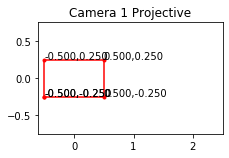

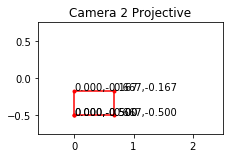

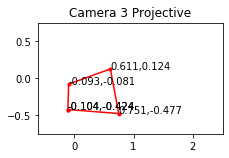

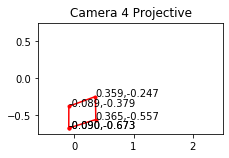

In [107]:
# Change the three matrices for the four cases as described in the problem
# in the four camera functions geiven below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 

def camera1():
    # write your code here
    # P_ext (4, 4)
    # P_int (3, 4)
    P_ext = np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,0],
                      [0,0,0,1]])
    P_int_proj = np.array([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]])
    
    return P_int_proj, P_ext

def camera2():
    # write your code here
    P_ext = np.array([[1,0,0,1],
                      [0,1,0,-1],
                      [0,0,1,1],
                      [0,0,0,1]])
    P_int_proj = np.array([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]])
    return P_int_proj, P_ext

def camera3():
    # write your code here
    R_y_45 = np.array([[np.cos(np.pi/4), 0, np.sin(np.pi/4)],
                       [0, 1, 0],
                       [-np.sin(np.pi/4), 0, np.cos(np.pi/4)]])
    R_x_20 = np.array([[1, 0, 0],
                       [0, np.cos(20*np.pi/180), -np.sin(20*np.pi/180)],
                       [0, np.sin(20*np.pi/180), np.cos(20*np.pi/180)]])
    R = R_x_20 @ R_y_45
    P_ext = np.c_[R,np.array([-1,0,1]).T]
    P_ext = np.append(P_ext, np.array([[0,0,0,1]]), axis = 0)
    P_int_proj = np.array([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]])
    return P_int_proj, P_ext

def camera4():    
    # write your code here
    R_y_45 = np.array([[np.cos(np.pi/4), 0, np.sin(np.pi/4)],
                       [0, 1, 0],
                       [-np.sin(np.pi/4), 0, np.cos(np.pi/4)]])
    R_x_20 = np.array([[1, 0, 0],
                       [0, np.cos(20*np.pi/180), -np.sin(20*np.pi/180)],
                       [0, np.sin(20*np.pi/180), np.cos(20*np.pi/180)]])
    R = R_x_20 @ R_y_45
    P_ext = np.c_[R, np.array([-1,-1,21]).T]
    P_ext = np.append(P_ext, np.array([[0,0,0,1]]), axis = 0)
    P_int_proj = np.array([[7,0,0,0],
                           [0,7,0,0],
                           [0,0,1,0]])
    return P_int_proj, P_ext

# Use the following code to display your outputs
# You are free to change the axis parameters to better 
# display your quadrilateral but do not remove any annotations

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    
    for i in range(len(points[0,inds])):
        plt.annotate(str("{0:.3f}".format(points[0,inds][i]))+","+str("{0:.3f}".format(points[1,inds][i])),(points[0,inds][i], points[1,inds][i]))
    
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
        
    plt.tight_layout()
        
def main():
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T 
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_ext = camera()
        #print(P_int_proj)
        #print(P_ext)
        plt.subplot(2, 2, i+1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1), axis=[-0.6,2.5,-0.75,0.75])
        plt.show()

main()



## Problem 3: Homography [12 pts]

Consider a vision application in which components of the scene are replaced by components from another image scene. 

In this problem, we will implement partial functionality of a smartphone camera scanning application (Example: CamScanner) that, in case you've never used before, takes pictures of documents and transforms it by warping and aligning to give an image similar to one which would've been obtained through using a scanner.

The transformation can be visualized by imagining the use of two cameras forming an image of a scene with a document. The scene would be the document you're trying to scan placed on a table and one of the cameras would be your smart phone camera, forming the image that you'll be uploading and using in this assignment. There can also be an ideally placed camera, oriented in the world in such a way that the image it forms of the scene has the document perfectly algined. While it is unlikely you can hold your phone still enough to get such an image, we can use homography to transform the image you take into the image that the ideally placed camera would have taken.

This digital replacement is accomplished by a set of corresponding points for the document in both the source (your picture) and target (the ideal) images. The task then consists of mapping the points from the source to their respective points in the target image. In the most general case, there would be no constraints on the scene geometry, making the problem quite hard to solve. If, however, the scene can be approximated by a plane in 3D, a solution can be formulated much more easily even without the knowledge of camera calibration parameters. 

To solve this section of the homework, you will begin by understanding the transformation that maps one image onto another in the planar scene case. Then you will write a program that implements this transformation and use it to warp some document into a well aligned document (See the given example to understand what we mean by well aligned).



To begin with, we consider the projection of planes in images. imagine two cameras $C_1$ and $C_2$ looking at a plane $\pi$ in the world. Consider a point $P$ on the plane $\pi$ and its projection $p=[\text{u1, v1, 1}]^T$ in the image 1 and $q=[\text{u2, v2, 1}]^T$ in image 2.

There exists a unique, upto scale, 3 $\times$ 3 matrix $H$ such that, for any point $P$:
$$q \approx Hp$$
Here $\approx$ denotes equality in homogeneous coordinates, meaning that the left and right hand sides are proportional. Note that $H$ only depends on the plane and the projection matrices of the two cameras.

The interesting thing about this result is that by using $H$ we can compute the image of $P$ that would be seen in the camera with center $C_2$ from the image of the point in the camera with center at $C_1$, without knowing the three dimensional location. Such an $H$ is a projective transformation of the plane, called a homography.

In this problem, complete the code for computeH and warp functions that can be used in the skeletal code that follows. 

There are three warp functions to implement in this assignment, example ouputs of which are shown below. In warp1, you will create a homography from points in your image to the target image (Mapping source points to target points). In warp2, the inverse of this process will be done. In warp3, you will create a homography between a given image and an image of an image being imaged. The goal will be to map the given image onto both the portrait as well as the screen of the tablet imaging the portrait. This will require the computation of two homographies.

1. ![title](forward.png) 
2. ![title](inverse.png)
3. <img src="side_by_side.png" alt="drawing" style="width:600px;"/>


1. In the context of this problem, the source image refers to the image of a document you take that needs to be replaced into the target. 
2. The target image can start out as an empty matrix that you fill out using your code.
3. You will have to implement the computeH function that computes a homography. It takes in exactly four point correspondences between the source image and target image in homogeneous coordinates respectively and returns a 3 $\times$ 3 homography matrix.
4. You will also have to implement the three warp functions in the skeleton code given and plot the resultant image pairs. For plotting the results of warps 1 and 2, make sure that the target image is not smaller than the source image.

Note: We have provided test code to check if your implementation for computeH is correct. All the code to plot the results needed is also provided along with the code to read in the images and other data required for this problem. Please try not to modify that code. 

You may find following python built-ins helpful:
numpy.linalg.svd, numpy.meshgrid

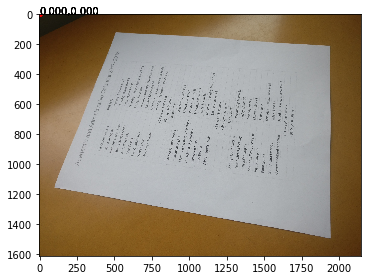

(1611, 2148, 3)


In [108]:
import numpy as np
from PIL import Image


import matplotlib.pyplot as plt

# load image to be used - resize to make sure it's not too large
# You can use the given image as well
# A large image will make testing you code take longer; once you're satisfied with your result,
# you can, if you wish to, make the image larger (or till your computer memory allows you to)

source_image = np.array(Image.open("photo.jpg"))/255

# display images
plt.imshow(source_image)

# Align the polygon such that the corners align with the document in your picture
# This polygon doesn't need to overlap with the edges perfectly, an approximation is fine
# The order of points is clockwise, starting from bottom left.
x_coords = [0,0,0,0] 
y_coords = [0,0,0,0]

# Plot points from the previous problem is used to draw over your image 
# Note that your coordinates will change once you resize your image again
source_points = np.vstack((x_coords, y_coords))
plot_points(source_points)

plt.show()
print (source_image.shape)

[[ 1.00000000e+00]
 [-1.69176842e-16]]


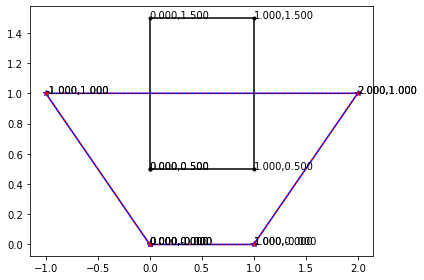

The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.


In [109]:
def computeH(source_points, target_points):
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) = target_points
    # where source_points and target_points are expected to be in homogeneous
    # make sure points are 3D homogeneous
    assert source_points.shape[0]==3 and target_points.shape[0]==3
    #Your code goes here
    x1, y1 = source_points[0][0], source_points[1][0]
    x1_, y1_ = target_points[0][0], target_points[1][0]
    
    x2, y2 = source_points[0][1], source_points[1][1]
    x2_, y2_ = target_points[0][1], target_points[1][1]
    
    x3, y3 = source_points[0][2], source_points[1][2]
    x3_, y3_ = target_points[0][2], target_points[1][2]
    
    x4, y4 = source_points[0][3], source_points[1][3]
    x4_, y4_ = target_points[0][3], target_points[1][3]
    
    P = np.array([[-x1, -y1, -1, 0, 0, 0, x1*x1_ , y1*x1_, x1_],
                  [0, 0, 0, -x1, -y1, -1, x1*y1_, y1*y1_, y1_],
                  [-x2, -y2, -1, 0, 0, 0, x2*x2_ , y2*x2_, x2_],
                  [0, 0, 0, -x2, -y2, -1, x2*y2_, y2*y2_, y2_],
                  [-x3, -y3, -1, 0, 0, 0, x3*x3_ , y3*x3_, x3_],
                  [0, 0, 0, -x3, -y3, -1, x3*y3_, y3*y3_, y3_],
                  [-x4, -y4, -1, 0, 0, 0, x4*x4_ , y4*x4_, x4_],
                  [0, 0, 0, -x4, -y4, -1, x4*y4_, y4*y4_, y4_]])
    
    U, S, Vh = np.linalg.svd(P)
    H = Vh.T[:,8]
    H_mtx = np.zeros((3,3)) #Fill in the H_mtx with appropriate values.
    H_mtx = np.array([[H[0], H[1], H[2]],
                      [H[3], H[4], H[5]],
                      [H[6], H[7], H[8]]])
    H_mtx = H_mtx/np.linalg.det(H_mtx)
    return  H_mtx
#######################################################
# test code. Do not modify
#######################################################
def test_computeH():
    source_points = np.array([[0,0.5],[1,0.5],[1,1.5],[0,1.5]]).T
    target_points = np.array([[0,0],[1,0],[2,1],[-1,1]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = from_homog(np.matmul(H,to_homog(source_points)))
    print (from_homog(np.matmul(H,to_homog(source_points[:,1].reshape(2,1)))))

    plot_points(source_points,style='.-k')
    plot_points(target_points,style='*-b')
    plot_points(mapped_points,style='.:r')
    plt.show()
    print('The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.')
test_computeH()

In [ ]:
def warp(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from source image to target image,
    # in other words map all source points to target points and then create
    # a warped version of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    assert target_size[2] == source_img.shape[2]
    #Your code goes here
    target_img = np.zeros(target_size)
    target_points = np.array([[0,0], [0, target_size[1]], 
                            [target_size[0], target_size[1]], [target_size[0], 0]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    for rgb in range(target_size[2]):
        for x in range(source_img.shape[0]):
            for y in range(source_img.shape[1]):
                source_homo = to_homog(np.array([[x, y]]).T)
                target_homo = H @ source_homo
                target_carte = from_homog(target_homo)
                rx = int(target_carte[0])
                ry = int(target_carte[1])
                if rx >= 0 and ry >= 0 and rx < target_img.shape[0] and ry < target_img.shape[1]:
                    target_img[rx][ry][rgb] = source_img[x][y][rgb]
                
    
    return target_img

source_image = np.array(Image.open("photo.jpg"))/255
source_points = np.array([[1180, 125],[1500, 1900],
                          [250, 1900],[150,500]]).T
# Use the code below to plot your result
result = warp(source_image, source_points, (100,100,3)) #Choose appropriate target size

plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imsave("myop.png",result)
plt.imshow(result)
plt.show()

114 -47 0 0
114 -47 0 1
114 -47 0 2
114 -47 0 3
114 -47 0 4
114 -47 0 5
114 -47 0 6
115 -47 0 7
115 -47 0 8
115 -47 0 9
115 -47 0 10
115 -46 0 11
115 -46 0 12
115 -46 0 13
115 -46 0 14
115 -46 0 15
115 -46 0 16
115 -46 0 17
115 -46 0 18
115 -46 0 19
115 -46 0 20
115 -46 0 21
115 -45 0 22
115 -45 0 23
115 -45 0 24
115 -45 0 25
115 -45 0 26
115 -45 0 27
115 -45 0 28
115 -45 0 29
115 -45 0 30
115 -45 0 31
115 -45 0 32
115 -44 0 33
115 -44 0 34
115 -44 0 35
115 -44 0 36
115 -44 0 37
115 -44 0 38
115 -44 0 39
115 -44 0 40
115 -44 0 41
115 -44 0 42
115 -44 0 43
115 -43 0 44
115 -43 0 45
115 -43 0 46
115 -43 0 47
115 -43 0 48
115 -43 0 49
115 -43 0 50
115 -43 0 51
115 -43 0 52
115 -43 0 53
115 -43 0 54
115 -42 0 55
115 -42 0 56
115 -42 0 57
115 -42 0 58
115 -42 0 59
115 -42 0 60
115 -42 0 61
115 -42 0 62
115 -42 0 63
115 -42 0 64
115 -42 0 65
115 -41 0 66
115 -41 0 67
115 -41 0 68
115 -41 0 69
115 -41 0 70
115 -41 0 71
115 -41 0 72
115 -41 0 73
115 -41 0 74
115 -41 0 75
115 -41 0 76
115 -41 0

120 19 0 791
120 19 0 792
120 19 0 793
120 19 0 794
120 19 0 795
120 19 0 796
120 19 0 797
120 19 0 798
120 19 0 799
120 19 0 800
120 19 0 801
120 20 0 802
121 20 0 803
121 20 0 804
121 20 0 805
121 20 0 806
121 20 0 807
121 20 0 808
121 20 0 809
121 20 0 810
121 20 0 811
121 20 0 812
121 20 0 813
121 20 0 814
121 21 0 815
121 21 0 816
121 21 0 817
121 21 0 818
121 21 0 819
121 21 0 820
121 21 0 821
121 21 0 822
121 21 0 823
121 21 0 824
121 21 0 825
121 21 0 826
121 21 0 827
121 22 0 828
121 22 0 829
121 22 0 830
121 22 0 831
121 22 0 832
121 22 0 833
121 22 0 834
121 22 0 835
121 22 0 836
121 22 0 837
121 22 0 838
121 22 0 839
121 23 0 840
121 23 0 841
121 23 0 842
121 23 0 843
121 23 0 844
121 23 0 845
121 23 0 846
121 23 0 847
121 23 0 848
121 23 0 849
121 23 0 850
121 23 0 851
121 23 0 852
121 24 0 853
121 24 0 854
121 24 0 855
121 24 0 856
121 24 0 857
121 24 0 858
121 24 0 859
121 24 0 860
121 24 0 861
121 24 0 862
121 24 0 863
121 24 0 864
121 24 0 865
121 25 0 866
121 25 0 867

125 67 0 1427
125 67 0 1428
125 67 0 1429
125 67 0 1430
125 67 0 1431
125 67 0 1432
125 67 0 1433
125 67 0 1434
125 67 0 1435
125 67 0 1436
125 67 0 1437
125 67 0 1438
125 68 0 1439
125 68 0 1440
125 68 0 1441
125 68 0 1442
125 68 0 1443
125 68 0 1444
125 68 0 1445
125 68 0 1446
125 68 0 1447
125 68 0 1448
125 68 0 1449
125 68 0 1450
125 68 0 1451
125 68 0 1452
125 69 0 1453
125 69 0 1454
125 69 0 1455
125 69 0 1456
125 69 0 1457
125 69 0 1458
125 69 0 1459
125 69 0 1460
125 69 0 1461
125 69 0 1462
125 69 0 1463
125 69 0 1464
125 69 0 1465
125 69 0 1466
125 70 0 1467
125 70 0 1468
125 70 0 1469
125 70 0 1470
125 70 0 1471
125 70 0 1472
125 70 0 1473
125 70 0 1474
125 70 0 1475
125 70 0 1476
125 70 0 1477
125 70 0 1478
125 70 0 1479
125 70 0 1480
125 71 0 1481
125 71 0 1482
125 71 0 1483
125 71 0 1484
125 71 0 1485
125 71 0 1486
125 71 0 1487
125 71 0 1488
125 71 0 1489
125 71 0 1490
125 71 0 1491
125 71 0 1492
125 71 0 1493
125 71 0 1494
125 72 0 1495
125 72 0 1496
125 72 0 1497
125 72

115 -38 1 109
115 -38 1 110
115 -37 1 111
115 -37 1 112
115 -37 1 113
115 -37 1 114
115 -37 1 115
115 -37 1 116
115 -37 1 117
115 -37 1 118
115 -37 1 119
115 -37 1 120
115 -37 1 121
115 -36 1 122
115 -36 1 123
115 -36 1 124
115 -36 1 125
115 -36 1 126
115 -36 1 127
115 -36 1 128
115 -36 1 129
115 -36 1 130
115 -36 1 131
115 -36 1 132
115 -35 1 133
115 -35 1 134
115 -35 1 135
115 -35 1 136
115 -35 1 137
115 -35 1 138
115 -35 1 139
115 -35 1 140
115 -35 1 141
115 -35 1 142
115 -35 1 143
115 -35 1 144
115 -34 1 145
115 -34 1 146
115 -34 1 147
115 -34 1 148
115 -34 1 149
116 -34 1 150
116 -34 1 151
116 -34 1 152
116 -34 1 153
116 -34 1 154
116 -34 1 155
116 -33 1 156
116 -33 1 157
116 -33 1 158
116 -33 1 159
116 -33 1 160
116 -33 1 161
116 -33 1 162
116 -33 1 163
116 -33 1 164
116 -33 1 165
116 -33 1 166
116 -32 1 167
116 -32 1 168
116 -32 1 169
116 -32 1 170
116 -32 1 171
116 -32 1 172
116 -32 1 173
116 -32 1 174
116 -32 1 175
116 -32 1 176
116 -32 1 177
116 -32 1 178
116 -31 1 179
116 -3

120 18 1 779
120 18 1 780
120 18 1 781
120 18 1 782
120 18 1 783
120 18 1 784
120 18 1 785
120 18 1 786
120 18 1 787
120 18 1 788
120 18 1 789
120 19 1 790
120 19 1 791
120 19 1 792
120 19 1 793
120 19 1 794
120 19 1 795
120 19 1 796
120 19 1 797
120 19 1 798
120 19 1 799
120 19 1 800
120 19 1 801
120 20 1 802
120 20 1 803
120 20 1 804
120 20 1 805
120 20 1 806
120 20 1 807
120 20 1 808
120 20 1 809
120 20 1 810
120 20 1 811
120 20 1 812
120 20 1 813
120 20 1 814
120 21 1 815
120 21 1 816
120 21 1 817
120 21 1 818
120 21 1 819
120 21 1 820
121 21 1 821
121 21 1 822
121 21 1 823
121 21 1 824
121 21 1 825
121 21 1 826
121 22 1 827
121 22 1 828
121 22 1 829
121 22 1 830
121 22 1 831
121 22 1 832
121 22 1 833
121 22 1 834
121 22 1 835
121 22 1 836
121 22 1 837
121 22 1 838
121 22 1 839
121 23 1 840
121 23 1 841
121 23 1 842
121 23 1 843
121 23 1 844
121 23 1 845
121 23 1 846
121 23 1 847
121 23 1 848
121 23 1 849
121 23 1 850
121 23 1 851
121 23 1 852
121 24 1 853
121 24 1 854
121 24 1 855

125 74 1 1529
125 74 1 1530
125 74 1 1531
125 74 1 1532
125 74 1 1533
125 74 1 1534
125 74 1 1535
125 74 1 1536
125 75 1 1537
125 75 1 1538
125 75 1 1539
125 75 1 1540
125 75 1 1541
125 75 1 1542
125 75 1 1543
125 75 1 1544
125 75 1 1545
125 75 1 1546
125 75 1 1547
125 75 1 1548
125 75 1 1549
125 75 1 1550
125 76 1 1551
125 76 1 1552
125 76 1 1553
125 76 1 1554
125 76 1 1555
125 76 1 1556
125 76 1 1557
125 76 1 1558
125 76 1 1559
125 76 1 1560
125 76 1 1561
125 76 1 1562
125 76 1 1563
125 76 1 1564
125 77 1 1565
125 77 1 1566
125 77 1 1567
125 77 1 1568
125 77 1 1569
125 77 1 1570
125 77 1 1571
125 77 1 1572
125 77 1 1573
126 77 1 1574
126 77 1 1575
126 77 1 1576
126 77 1 1577
126 77 1 1578
126 77 1 1579
126 78 1 1580
126 78 1 1581
126 78 1 1582
126 78 1 1583
126 78 1 1584
126 78 1 1585
126 78 1 1586
126 78 1 1587
126 78 1 1588
126 78 1 1589
126 78 1 1590
126 78 1 1591
126 78 1 1592
126 78 1 1593
126 79 1 1594
126 79 1 1595
126 79 1 1596
126 79 1 1597
126 79 1 1598
126 79 1 1599
126 79

115 -33 2 161
115 -33 2 162
115 -33 2 163
115 -33 2 164
115 -33 2 165
115 -33 2 166
116 -32 2 167
116 -32 2 168
116 -32 2 169
116 -32 2 170
116 -32 2 171
116 -32 2 172
116 -32 2 173
116 -32 2 174
116 -32 2 175
116 -32 2 176
116 -32 2 177
116 -31 2 178
116 -31 2 179
116 -31 2 180
116 -31 2 181
116 -31 2 182
116 -31 2 183
116 -31 2 184
116 -31 2 185
116 -31 2 186
116 -31 2 187
116 -31 2 188
116 -31 2 189
116 -30 2 190
116 -30 2 191
116 -30 2 192
116 -30 2 193
116 -30 2 194
116 -30 2 195
116 -30 2 196
116 -30 2 197
116 -30 2 198
116 -30 2 199
116 -30 2 200
116 -29 2 201
116 -29 2 202
116 -29 2 203
116 -29 2 204
116 -29 2 205
116 -29 2 206
116 -29 2 207
116 -29 2 208
116 -29 2 209
116 -29 2 210
116 -29 2 211
116 -29 2 212
116 -28 2 213
116 -28 2 214
116 -28 2 215
116 -28 2 216
116 -28 2 217
116 -28 2 218
116 -28 2 219
116 -28 2 220
116 -28 2 221
116 -28 2 222
116 -28 2 223
116 -27 2 224
116 -27 2 225
116 -27 2 226
116 -27 2 227
116 -27 2 228
116 -27 2 229
116 -27 2 230
116 -27 2 231
116 -2

122 35 2 1005
122 35 2 1006
122 36 2 1007
122 36 2 1008
122 36 2 1009
122 36 2 1010
122 36 2 1011
122 36 2 1012
122 36 2 1013
122 36 2 1014
122 36 2 1015
122 36 2 1016
122 36 2 1017
122 36 2 1018
122 36 2 1019
122 37 2 1020
122 37 2 1021
122 37 2 1022
122 37 2 1023
122 37 2 1024
122 37 2 1025
122 37 2 1026
122 37 2 1027
122 37 2 1028
122 37 2 1029
122 37 2 1030
122 37 2 1031
122 37 2 1032
122 38 2 1033
122 38 2 1034
122 38 2 1035
122 38 2 1036
122 38 2 1037
122 38 2 1038
122 38 2 1039
122 38 2 1040
122 38 2 1041
122 38 2 1042
122 38 2 1043
122 38 2 1044
122 38 2 1045
122 39 2 1046
122 39 2 1047
122 39 2 1048
122 39 2 1049
122 39 2 1050
122 39 2 1051
122 39 2 1052
122 39 2 1053
122 39 2 1054
122 39 2 1055
122 39 2 1056
122 39 2 1057
122 39 2 1058
122 40 2 1059
122 40 2 1060
122 40 2 1061
122 40 2 1062
122 40 2 1063
122 40 2 1064
122 40 2 1065
122 40 2 1066
122 40 2 1067
122 40 2 1068
122 40 2 1069
122 40 2 1070
122 40 2 1071
122 40 2 1072
122 41 2 1073
122 41 2 1074
122 41 2 1075
122 41

127 94 2 1813
127 94 2 1814
127 94 2 1815
127 94 2 1816
127 94 2 1817
127 94 2 1818
127 94 2 1819
127 94 2 1820
127 94 2 1821
127 94 2 1822
127 94 2 1823
127 94 2 1824
127 94 2 1825
127 95 2 1826
127 95 2 1827
127 95 2 1828
127 95 2 1829
127 95 2 1830
127 95 2 1831
127 95 2 1832
127 95 2 1833
127 95 2 1834
127 95 2 1835
127 95 2 1836
127 95 2 1837
127 95 2 1838
127 95 2 1839
127 95 2 1840
127 96 2 1841
127 96 2 1842
127 96 2 1843
127 96 2 1844
127 96 2 1845
127 96 2 1846
127 96 2 1847
127 96 2 1848
127 96 2 1849
127 96 2 1850
127 96 2 1851
127 96 2 1852
127 96 2 1853
127 96 2 1854
127 96 2 1855
127 97 2 1856
127 97 2 1857
127 97 2 1858
127 97 2 1859
127 97 2 1860
127 97 2 1861
127 97 2 1862
127 97 2 1863
127 97 2 1864
127 97 2 1865
127 97 2 1866
127 97 2 1867
127 97 2 1868
127 97 2 1869
127 97 2 1870
127 98 2 1871
127 98 2 1872
127 98 2 1873
127 98 2 1874
127 98 2 1875
127 98 2 1876
127 98 2 1877
127 98 2 1878
127 98 2 1879
127 98 2 1880
127 98 2 1881
127 98 2 1882
127 98 2 1883
127 98

117 -18 3 335
117 -18 3 336
117 -18 3 337
117 -18 3 338
117 -17 3 339
117 -17 3 340
117 -17 3 341
117 -17 3 342
117 -17 3 343
117 -17 3 344
117 -17 3 345
117 -17 3 346
117 -17 3 347
117 -17 3 348
117 -17 3 349
117 -17 3 350
117 -16 3 351
117 -16 3 352
117 -16 3 353
117 -16 3 354
117 -16 3 355
117 -16 3 356
117 -16 3 357
117 -16 3 358
117 -16 3 359
117 -16 3 360
117 -16 3 361
117 -16 3 362
117 -15 3 363
117 -15 3 364
117 -15 3 365
117 -15 3 366
117 -15 3 367
117 -15 3 368
117 -15 3 369
117 -15 3 370
117 -15 3 371
117 -15 3 372
117 -15 3 373
117 -15 3 374
117 -14 3 375
117 -14 3 376
117 -14 3 377
117 -14 3 378
117 -14 3 379
117 -14 3 380
117 -14 3 381
117 -14 3 382
117 -14 3 383
117 -14 3 384
117 -14 3 385
117 -14 3 386
117 -13 3 387
117 -13 3 388
117 -13 3 389
117 -13 3 390
117 -13 3 391
117 -13 3 392
117 -13 3 393
117 -13 3 394
117 -13 3 395
117 -13 3 396
117 -13 3 397
117 -12 3 398
117 -12 3 399
117 -12 3 400
117 -12 3 401
117 -12 3 402
117 -12 3 403
117 -12 3 404
117 -12 3 405
117 -1

122 46 3 1145
122 46 3 1146
122 46 3 1147
122 46 3 1148
123 46 3 1149
123 46 3 1150
123 46 3 1151
123 47 3 1152
123 47 3 1153
123 47 3 1154
123 47 3 1155
123 47 3 1156
123 47 3 1157
123 47 3 1158
123 47 3 1159
123 47 3 1160
123 47 3 1161
123 47 3 1162
123 47 3 1163
123 47 3 1164
123 48 3 1165
123 48 3 1166
123 48 3 1167
123 48 3 1168
123 48 3 1169
123 48 3 1170
123 48 3 1171
123 48 3 1172
123 48 3 1173
123 48 3 1174
123 48 3 1175
123 48 3 1176
123 48 3 1177
123 48 3 1178
123 49 3 1179
123 49 3 1180
123 49 3 1181
123 49 3 1182
123 49 3 1183
123 49 3 1184
123 49 3 1185
123 49 3 1186
123 49 3 1187
123 49 3 1188
123 49 3 1189
123 49 3 1190
123 49 3 1191
123 50 3 1192
123 50 3 1193
123 50 3 1194
123 50 3 1195
123 50 3 1196
123 50 3 1197
123 50 3 1198
123 50 3 1199
123 50 3 1200
123 50 3 1201
123 50 3 1202
123 50 3 1203
123 50 3 1204
123 50 3 1205
123 51 3 1206
123 51 3 1207
123 51 3 1208
123 51 3 1209
123 51 3 1210
123 51 3 1211
123 51 3 1212
123 51 3 1213
123 51 3 1214
123 51 3 1215
123 51

128 103 3 1945
128 103 3 1946
128 103 3 1947
128 103 3 1948
128 103 3 1949
128 103 3 1950
128 103 3 1951
128 103 3 1952
128 103 3 1953
128 103 3 1954
128 103 3 1955
128 103 3 1956
128 103 3 1957
128 103 3 1958
128 103 3 1959
128 103 3 1960
128 104 3 1961
128 104 3 1962
128 104 3 1963
128 104 3 1964
128 104 3 1965
128 104 3 1966
128 104 3 1967
128 104 3 1968
128 104 3 1969
128 104 3 1970
128 104 3 1971
128 104 3 1972
128 104 3 1973
128 104 3 1974
128 104 3 1975
128 105 3 1976
128 105 3 1977
128 105 3 1978
128 105 3 1979
128 105 3 1980
128 105 3 1981
128 105 3 1982
128 105 3 1983
128 105 3 1984
128 105 3 1985
128 105 3 1986
128 105 3 1987
128 105 3 1988
128 105 3 1989
128 105 3 1990
128 106 3 1991
128 106 3 1992
128 106 3 1993
128 106 3 1994
128 106 3 1995
128 106 3 1996
128 106 3 1997
128 106 3 1998
128 106 3 1999
128 106 3 2000
128 106 3 2001
128 106 3 2002
128 106 3 2003
128 106 3 2004
128 106 3 2005
128 107 3 2006
128 107 3 2007
128 107 3 2008
128 107 3 2009
128 107 3 2010
128 107 3 

118 3 4 596
119 3 4 597
119 3 4 598
119 3 4 599
119 3 4 600
119 3 4 601
119 4 4 602
119 4 4 603
119 4 4 604
119 4 4 605
119 4 4 606
119 4 4 607
119 4 4 608
119 4 4 609
119 4 4 610
119 4 4 611
119 4 4 612
119 4 4 613
119 4 4 614
119 5 4 615
119 5 4 616
119 5 4 617
119 5 4 618
119 5 4 619
119 5 4 620
119 5 4 621
119 5 4 622
119 5 4 623
119 5 4 624
119 5 4 625
119 5 4 626
119 6 4 627
119 6 4 628
119 6 4 629
119 6 4 630
119 6 4 631
119 6 4 632
119 6 4 633
119 6 4 634
119 6 4 635
119 6 4 636
119 6 4 637
119 6 4 638
119 7 4 639
119 7 4 640
119 7 4 641
119 7 4 642
119 7 4 643
119 7 4 644
119 7 4 645
119 7 4 646
119 7 4 647
119 7 4 648
119 7 4 649
119 7 4 650
119 7 4 651
119 8 4 652
119 8 4 653
119 8 4 654
119 8 4 655
119 8 4 656
119 8 4 657
119 8 4 658
119 8 4 659
119 8 4 660
119 8 4 661
119 8 4 662
119 8 4 663
119 9 4 664
119 9 4 665
119 9 4 666
119 9 4 667
119 9 4 668
119 9 4 669
119 9 4 670
119 9 4 671
119 9 4 672
119 9 4 673
119 9 4 674
119 9 4 675
119 10 4 676
119 10 4 677
119 10 4 678
1

123 58 4 1307
123 58 4 1308
123 58 4 1309
123 58 4 1310
123 58 4 1311
123 58 4 1312
123 58 4 1313
123 59 4 1314
123 59 4 1315
123 59 4 1316
123 59 4 1317
123 59 4 1318
124 59 4 1319
124 59 4 1320
124 59 4 1321
124 59 4 1322
124 59 4 1323
124 59 4 1324
124 59 4 1325
124 59 4 1326
124 59 4 1327
124 60 4 1328
124 60 4 1329
124 60 4 1330
124 60 4 1331
124 60 4 1332
124 60 4 1333
124 60 4 1334
124 60 4 1335
124 60 4 1336
124 60 4 1337
124 60 4 1338
124 60 4 1339
124 60 4 1340
124 61 4 1341
124 61 4 1342
124 61 4 1343
124 61 4 1344
124 61 4 1345
124 61 4 1346
124 61 4 1347
124 61 4 1348
124 61 4 1349
124 61 4 1350
124 61 4 1351
124 61 4 1352
124 61 4 1353
124 61 4 1354
124 62 4 1355
124 62 4 1356
124 62 4 1357
124 62 4 1358
124 62 4 1359
124 62 4 1360
124 62 4 1361
124 62 4 1362
124 62 4 1363
124 62 4 1364
124 62 4 1365
124 62 4 1366
124 62 4 1367
124 62 4 1368
124 63 4 1369
124 63 4 1370
124 63 4 1371
124 63 4 1372
124 63 4 1373
124 63 4 1374
124 63 4 1375
124 63 4 1376
124 63 4 1377
124 63

128 109 4 2041
128 109 4 2042
128 109 4 2043
128 109 4 2044
128 109 4 2045
128 109 4 2046
128 109 4 2047
128 109 4 2048
128 109 4 2049
128 109 4 2050
128 109 4 2051
128 110 4 2052
128 110 4 2053
128 110 4 2054
128 110 4 2055
128 110 4 2056
128 110 4 2057
128 110 4 2058
128 110 4 2059
128 110 4 2060
128 110 4 2061
128 110 4 2062
128 110 4 2063
128 110 4 2064
128 110 4 2065
128 110 4 2066
128 111 4 2067
128 111 4 2068
128 111 4 2069
128 111 4 2070
128 111 4 2071
128 111 4 2072
128 111 4 2073
128 111 4 2074
128 111 4 2075
128 111 4 2076
128 111 4 2077
128 111 4 2078
128 111 4 2079
128 111 4 2080
128 111 4 2081
128 112 4 2082
128 112 4 2083
128 112 4 2084
128 112 4 2085
128 112 4 2086
128 112 4 2087
128 112 4 2088
128 112 4 2089
128 112 4 2090
128 112 4 2091
128 112 4 2092
128 112 4 2093
128 112 4 2094
128 112 4 2095
128 112 4 2096
128 112 4 2097
128 113 4 2098
128 113 4 2099
128 113 4 2100
128 113 4 2101
128 113 4 2102
128 113 4 2103
128 113 4 2104
128 113 4 2105
128 113 4 2106
128 113 4 

The output of warp1 of your code probably has some striations or noise. The larger you make your target image, the less it will resemble the document in the source image. Why is this happening? 

To fix this, implement warp2, by creating an inverse homography matrix and fill in the target image.

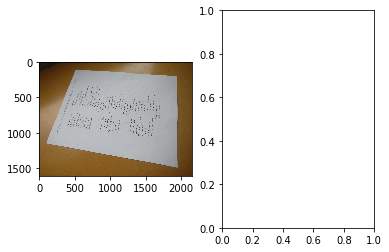

In [31]:
def warp2(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from target image to source image,
    # in other words map each target point to a source point, and then create a warped version
    # of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    
    #Your code goes here
    return target_img

# Use the code below to plot your result
result = warp2(source_image, source_points, (0,0,0)) #Choose appropriate size
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
#plt.imshow(result)
#plt.imsave("warp2.png",result)
plt.show()

Try playing around with the size of your target image in warp1 versus in warp2, additionally you can also implement nearest pixel interpolation or bi-linear interpolations and see if that makes a difference in your output.

In warp3, you'll be replacing the portrait and image of the portrait in a provided image with another image. Read in "bear.png" as the source image, and "gallery.png" will serve as the target. 

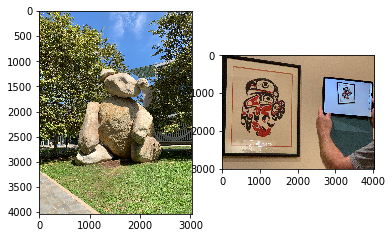

In [33]:
bear = np.array(Image.open("bear.png"))/255
gallery = np.array(Image.open("gallery.png"))/255
plt.subplot(1, 2, 1)
plt.imshow(bear)
plt.subplot(1, 2, 2)
plt.imshow(gallery)
plt.show()

NameError: name 'source_image2' is not defined

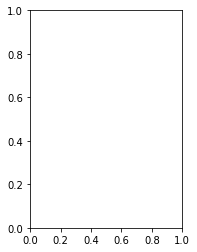

In [32]:
# Load the supplied source and target images here

def warp3(target_image, target_points, source_image):
    #Your code goes here
    return target_image


# Use the code below to plot your result
result1 = warp3(target_image, target_points, source_image)
plt.subplot(1, 2, 1)
plt.imshow(source_image2)
plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.imsave("warp3.png",result1)
plt.show()

## Problem 4: Surface Rendering [18 pts]

In this portion of the assignment we will be exploring different methods of approximating local illumination of
objects in a scene. This last section of the homework will be an exercise in rendering surfaces. Here, you need use the surface normals and the masks from the provided pickle files, with various light sources, different materials, and using a number of illumination models. For the sake of simplicity, multiple reflections of light rays, and occlusion of light rays due to object/scene can be ignored.

### Data

The surface normals and masks are to be loaded from the respective pickle files. For comparison, you should display the rendering results for both normals calculated from the original image and the diffuse components. There are 2 images that we will be playing with--namely one of a sphere and the other of a pear.

Assume that the albedo map is uniform.

### Lambertian Illumination

One of the simplest models available to render 3D objections with illumination is the Lambertian model. This
model finds the apparent brightness to an observer using the direction of the light source $\mathbf{L}$ and the normal
vector on the surface of the object $\mathbf{N}$. The brightness intensity at a given point on an object’s surface, $\mathbf{I_d}$, with
a single light source is found using the following relationship:

$$\mathbf{I_d} = \mathbf{L} \cdot \mathbf{N} (I_l\mathbf{C})$$

where, $\mathbf{C}$ and $I_l$ are the the color and intensity of the light source respectively.

### Phong Illumination

One major drawback of Lambertian illumination is that it only considers the diffuse light in its calculation of
brightness intensity. One other major component to illumination rendering is the specular component. The
specular reflectance is the component of light that is reflected in a single direction, as opposed to all directions,
which is the case in diffuse reflectance. One of the most used models to compute surface brightness with specular
components is the Phong illumination model. This model combines ambient lighting, diffused reflectance as well
as specular reflectance to find the brightness on a surface. Phong shading also considers the material in the scene
which is characterized by four values: the ambient reflection constant ($k_a$), the diffuse reflection constant ($k_d$),
the specular reflection constant ($k_s$) and $\alpha$ the Phong constant, which is the ‘shininess’ of an object. Furthermore,
since the specular component produces ‘rays’, only some of which would be observed by a single observer, the
observer’s viewing direction ($\mathbf{V}$) must also be known. For some scene with known material parameters with $M$
light sources the light intensity $\mathbf{I}_{phong}$ on a surface with normal vector $\mathbf{N}$ seen from viewing direction $\mathbf{V}$ can be
computed by:

$$\mathbf{I}_{phong} = k_{a}\mathbf{I}_{a} + \sum_{m\in M}\left\{k_d(\mathbf{L}_{m}\cdot\mathbf{N})\mathbf{I}_{m,d} + k_{s}(\mathbf{R}_{m}\cdot\mathbf{V})^{\alpha}\mathbf{I}_{m,s}\right\}\text{,}$$

$$\mathbf{R}_{m} = 2\mathbf{N}(\mathbf{L}_{m}\cdot\mathbf{N}) - \mathbf{L}_{m}\text{,}$$

where $\mathbf{I}_{a}$, is the color and intensity of the ambient lighting, $\mathbf{I}_{m,d}$ and $\mathbf{I}_{m,s}$ are the color values for the diffuse and
specular light of the $m$th light source.

### Rendering

Please complete the following:

1. Write the function `lambertian()` that calculates the Lambertian light intensity given the light direction $\mathbf{L}$ with color and intensity $\mathbf{C}$ and $I_l = 1$, and normal vector $\mathbf{N}$. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the two lighting sources found in Table 1. *Note: You do not need to worry about material coefficients in this model.*

1. Write the function `phong()` that calculates the Phong light intensity given the material constants $(k_a, k_d, k_s, \alpha)$, $\mathbf{V} = (0, 0, 1)^\top$, $\mathbf{N}$ and some number of $M$ light sources. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the sets of coefficients found in Table 2 with each light source individually, and both light sources combined.

*Hint: To avoid artifacts due to shadows, ensure that any negative intensities found are set to zero.*


Table 1: Light Sources

| $m$ | Location | Color (RGB)  |
| - | ------------------ | ------- |
| 1 |  $(1,1,0)^{\top}$     | $(0.75,0.75,0.5)$ |
| 2 |  $(\tfrac{1}{3},-\tfrac{1}{3},\tfrac{1}{2})^{\top}$ | $(1,1,1)$|

Table 2: Material Coefficients

| Mat. | $k_a$ | $k_d$ | $k_s$ | $\alpha$ |
| - | -------- | ----- | ----- | -------- |
| 1 | $0$ | $0.1$ | $0.75$ | $5$ |
| 2 | $0$ | $0.5$ | $0.1$ | $5$ |
| 3 | $0$ | $0.5$ | $0.5$ | $10$ |

### Part 1. Loading pickle files and plotting the normals [4 pts] (Sphere - 2pts, Pear - 2pts)
In this first part, you are required to work with 2 images, one of a sphere and the other one of a pear. The pickle file normals.pickle is a list consisting of 4 numpy matrices which are    
1) Normal Vectors for the sphere with specularities removed (Diffuse component)  
2) Normal Vector for the sphere    
3) Normal Vectors for the pear with specularities removed (Diffuse component)  
4) Normal vectors for the pear  
Please load the normals and plot them using the function plot_normals which is provided.

In [ ]:
def plot_normals(diffuse_normals, original_normals):
    # Stride in the plot, you may want to adjust it to different images
    stride = 5
    
    normalss = diffuse_normals
    normalss1 = original_normals
    
    print("Normals:")
    print("Diffuse")
    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss[..., 2])
    plt.show()
    print("Original")
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss1[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss1[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss1[..., 2])
    plt.show()

In [ ]:
#Plot the normals for the sphere and pear for both the normal and diffuse components.
#1 : Load the different normals
# LOAD HERE

#2 : Plot the normals using plot_normals
#What do you observe? What are the differences between the diffuse component and the original images shown?

#PLOT HERE

### Part 2. Lambertian model [6 pts]

Fill in your implementation for the rendered image using the lambertian model.

In [ ]:
def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

In [ ]:
def lambertian(normals, lights, color, intensity, mask):
    '''Your implementation'''
    image = np.ones((normals.shape[0], normals.shape[1], 3))
    return (image)

Plot the rendered results for both the sphere and the pear for both the original and the diffuse components. Remember to first load the masks from the masks.pkl file. The masks.pkl file is a list consisting of 2 numpy arrays-  
1)Mask for the sphere  
2)Mask for the pear  
Remember to plot the normalized image using the function normalize which is provided.

In [ ]:
# Load the masks for the sphere and pear
# LOAD HERE

# Output the rendering results for Pear
dirn1 = np.array([[1.0],[1.0],[0]])
color1 = np.array([[.75],[.75],[.5]])
dirn2 = np.array([[1.0/3],[-1.0/3],[1.0/2]])
color2 = np.array([[1],[1],[1]])

#Display the rendering results for pear for both diffuse and for both the light sources

In [ ]:
# Output the rendering results for Sphere
dirn1 = np.array([[1.0],[1.0],[0]])
color1 = np.array([[.75],[.75],[.5]])
dirn2 = np.array([[1.0/3],[-1.0/3],[1.0/2]])
color2 = np.array([[1],[1],[1]])
#Display the rendering results for sphere for both diffuse and for both the light sources

### Part 3. Phong model [8 pts]

Please fill in your implementation for the Phong model below.

In [ ]:
def phong(normals, lights, color, material, view, mask):
    '''Your implementation'''
    return (image)

With the function completed, plot the rendering results for the sphere and pear (both diffuse and original compnents) for all the materials and light sources and also with the combination of both the light sources.

In [ ]:
# Output the rendering results for sphere
view =  np.array([[0],[0],[1]])
material = np.array([[0.1,0.75,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 = np.array([[1,0.75],[1,0.75],[0,0.5]])
lightcol2 =  np.array([[1.0/3,1],[-1.0/3,1],[1.0/2,1]])
#Display rendered results for sphere for all materials and light sources and combination of light sources

In [ ]:
# Output the rendering results for the pear.
view =  np.array([[0],[0],[1]])
material = np.array([[0.1,0.75,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 = np.array([[1,0.75],[1,0.75],[0,0.5]])
lightcol2 =  np.array([[1.0/3,1],[-1.0/3,1],[1.0/2,1]])
#Display rendered results for pear for all materials and light sources and combination of light sources